In [1]:
import os, sys, glob, json, scipy as sp
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [2]:
foldpath = os.getcwd()+"/Data/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))

In [3]:
BHMasses = np.asarray([data[i]["SMBHMASS"] for i in range(len(data))])
ProcaMasses = np.asarray([data[i]["PROCAMASS"] for i in range(len(data))])
Faith = np.asarray([data[i]["faithfulness"] for i in range(len(data))])

interps = []
bhmasses = []
newpran = []
for inx, b in enumerate(BHMasses):
    pmass = ProcaMasses[BHMasses==b]
    sorter = np.argsort(pmass)
    pmass = pmass[sorter]
    faith = Faith[BHMasses==b][sorter]
    if len(faith)<2:
        continue
    bhmasses.append(b)
    interps.append(sp.interpolate.interp1d(pmass, faith, bounds_error=False))

In [4]:
xdat = []
ydat = []
zdat = []
for inx, b in enumerate(bhmasses):
    for inx1, p in enumerate(np.arange(min(ProcaMasses), max(ProcaMasses), 1e-21)):
        xdat.append(b)
        ydat.append(p)
        zdat.append(interps[inx](p))

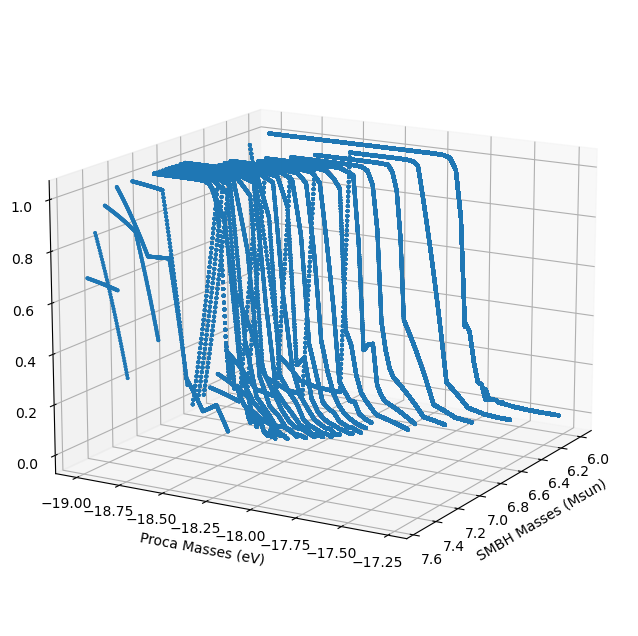

In [5]:

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (eV)")
ax.set_xlabel("SMBH Masses (Msun)")
ax.view_init(15,30)

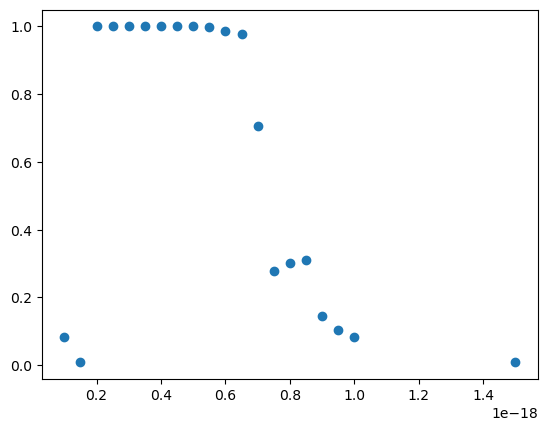

In [6]:
inxer = BHMasses==3e6
plt.scatter(ProcaMasses[inxer], Faith[inxer])